Epoch 1/11
938/938 [==============================] - 2s 2ms/step - loss: 0.8546 - accuracy: 0.7947 - val_loss: 0.4502 - val_accuracy: 0.8857
Epoch 2/11
938/938 [==============================] - 1s 1ms/step - loss: 0.4138 - accuracy: 0.8898 - val_loss: 0.3520 - val_accuracy: 0.9081
Epoch 3/11
938/938 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.9034 - val_loss: 0.3132 - val_accuracy: 0.9147
Epoch 4/11
938/938 [==============================] - 1s 1ms/step - loss: 0.3161 - accuracy: 0.9117 - val_loss: 0.2921 - val_accuracy: 0.9202
Epoch 5/11
938/938 [==============================] - 1s 1ms/step - loss: 0.2932 - accuracy: 0.9183 - val_loss: 0.2726 - val_accuracy: 0.9240
Epoch 6/11
938/938 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.9228 - val_loss: 0.2579 - val_accuracy: 0.9287
Epoch 7/11
938/938 [==============================] - 1s 2ms/step - loss: 0.2609 - accuracy: 0.9267 - val_loss: 0.2455 - val_accuracy: 0.9308
Epoch 

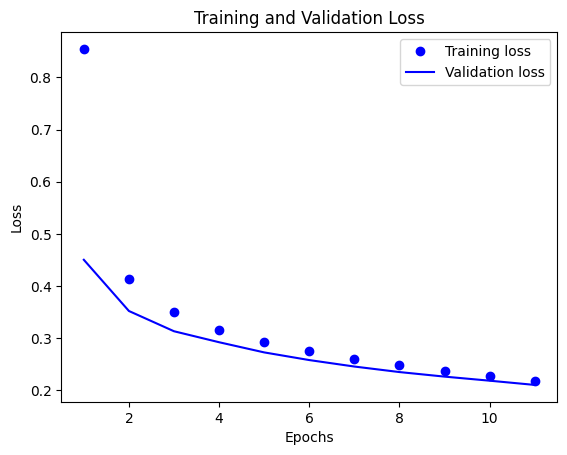

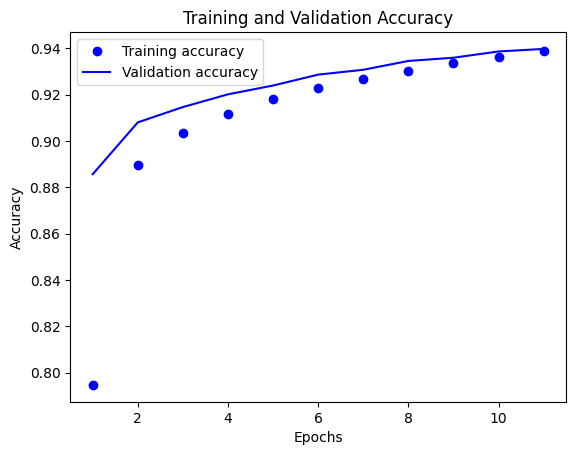

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

train_data = pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_train.csv')
test_data = pd.read_csv('LP-IV-datasets/MNIST(Ass2&3)/mnist_test.csv')

train_images = train_data.drop('label', axis=1).values
train_labels = train_data['label'].values

test_images = test_data.drop('label', axis=1).values
test_labels = test_data['label'].values

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=11, batch_size=64, validation_data=(test_images, test_labels))

# e. Evaluate the network
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

# f. Plot the training loss and accuracy
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

